In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 특정 기간동안의 따릉이 대여 데이터와 기상 데이터로 1시간 후의 따릉이 대여 수 예측 모델 개발

# 데이터 불러오기

In [2]:
import pandas as pd

train = pd.read_csv('/content/drive/MyDrive/train.csv')
test = pd.read_csv('/content/drive/MyDrive/test.csv')

from sklearn.linear_model import LinearRegression  #선형회귀
from sklearn.tree import DecisionTreeRegressor #의사결정나무
from sklearn.ensemble import RandomForestRegressor #랜덤포레스트

submission = pd.read_csv('/content/drive/MyDrive/submission.csv')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [5]:
print(train.shape)
print(test.shape)
print(submission.shape)

train.info()

(1459, 11)
(715, 10)
(715, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      1459 non-null   int64  
 1   hour                    1459 non-null   int64  
 2   hour_bef_temperature    1457 non-null   float64
 3   hour_bef_precipitation  1457 non-null   float64
 4   hour_bef_windspeed      1450 non-null   float64
 5   hour_bef_humidity       1457 non-null   float64
 6   hour_bef_visibility     1457 non-null   float64
 7   hour_bef_ozone          1383 non-null   float64
 8   hour_bef_pm10           1369 non-null   float64
 9   hour_bef_pm2.5          1342 non-null   float64
 10  count                   1459 non-null   float64
dtypes: float64(9), int64(2)
memory usage: 125.5 KB


In [6]:
train.describe() #기술통계확인

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
count,1459.000000,1459.000000,1457.000000,1457.000000,1450.000000,1457.000000,1457.000000,1383.000000,1369.000000,1342.000000,1459.000000
mean,1105.914325,11.493489,16.717433,0.031572,2.479034,52.231297,1405.216884,0.039149,57.168736,30.327124,108.563400
std,631.338681,6.922790,5.239150,0.174917,1.378265,20.370387,583.131708,0.019509,31.771019,14.713252,82.631733
min,3.000000,0.000000,3.100000,0.000000,0.000000,7.000000,78.000000,0.003000,9.000000,8.000000,1.000000
25%,555.500000,5.500000,12.800000,0.000000,1.400000,36.000000,879.000000,0.025500,36.000000,20.000000,37.000000
50%,1115.000000,11.000000,16.600000,0.000000,2.300000,51.000000,1577.000000,0.039000,51.000000,26.000000,96.000000
75%,1651.000000,17.500000,20.100000,0.000000,3.400000,69.000000,1994.000000,0.052000,69.000000,37.000000,150.000000
max,2179.000000,23.000000,30.000000,1.000000,8.000000,99.000000,2000.000000,0.125000,269.000000,90.000000,431.000000


# matplotlib 시각화

Text(18, 260, 'leave work')

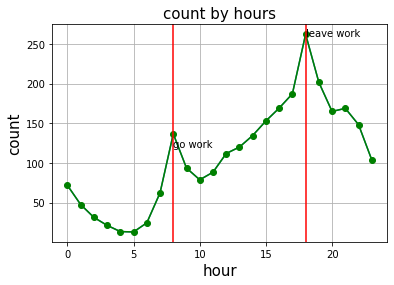

In [7]:
# 시간에 따른 대여량 시각화
train.groupby('hour').mean()['count'].plot()

plt.plot(train.groupby('hour').mean()['count'], 'go-') 
plt.grid() 

plt.title('count by hours', fontsize = 15) 
plt.xlabel('hour', fontsize = 15) 
plt.ylabel('count', fontsize = 15) 

plt.axvline(8, color = 'r') 
plt.axvline(18, color = 'r') 

plt.text(8, 120, 'go work', fontsize = 10) 
plt.text(18, 260, 'leave work', fontsize = 10)

# 상관계수 

In [8]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


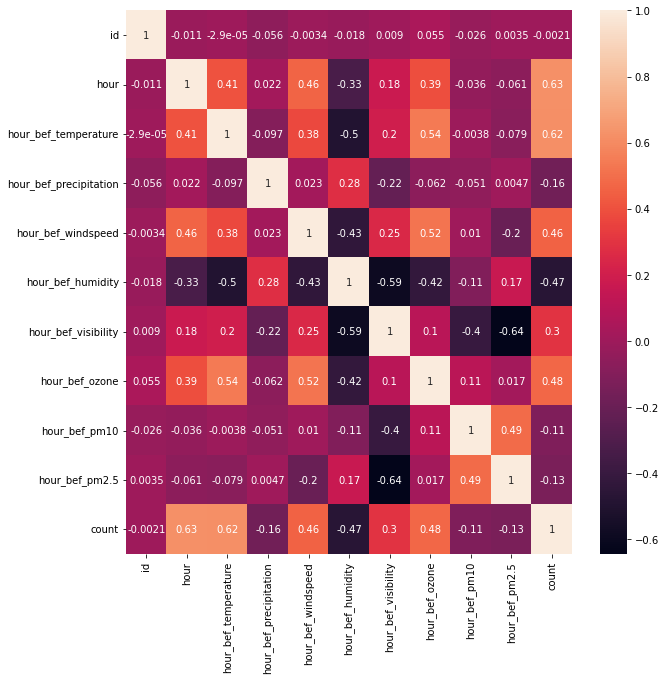

In [9]:
# 상관계수 시각화 -> 시간, 1시간 전 온도, 1시간 전 풍속 순으로 상관성이 높음 : 분석 
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(), annot=True)


# 전처리

In [10]:
train.isna().sum()

id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [11]:
# 온도 결측치
train[train['hour_bef_temperature'].isna()]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


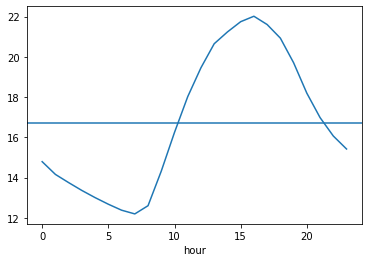

In [12]:
# 시간대 별 온도 그래프
train.groupby('hour').mean()['hour_bef_temperature'].plot()
plt.axhline(train.groupby('hour').mean()['hour_bef_temperature'].mean())
# 시간대 별로 온도가 다르기 때문에 결측치에 온도의 평균값을 넣어주는 것은 적절하지 않음

In [13]:
train.groupby('hour').mean()['hour_bef_temperature']
train['hour_bef_temperature'].fillna({934:14.788136, 1035:20.926667}, inplace = True) # 시간대별 온도 평균값을 넣어줌

train.loc[[934, 1035], :]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
934,1420,0,14.788136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [14]:
# 풍속 결측치
train[train['hour_bef_windspeed'].isna()]
train[train['hour_bef_windspeed'].isna()].index

Int64Index([18, 244, 260, 376, 780, 934, 1035, 1138, 1229], dtype='int64')

In [15]:
train.groupby('hour').mean()['hour_bef_windspeed'] #시간대별 평균 풍속도
train['hour_bef_windspeed'].fillna({18: 3.281356, 244: 1.836667, 260: 1.620000, 376: 1.965517, 780: 3.278333, 934: 1.965517, 1035: 3.838333, 1138: 2.766667, 1229: 1.633333}, inplace = True)
train.loc[[18, 244, 260, 376, 780, 934, 1035, 1138, 1229], :]

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
18,33,13,22.600000,0.0,3.281356,41.0,987.0,0.046,64.0,39.0,208.0
244,381,1,14.100000,0.0,1.836667,55.0,1992.0,NaN,NaN,NaN,38.0
260,404,3,14.000000,0.0,1.620000,50.0,2000.0,0.049,35.0,22.0,17.0
376,570,0,14.300000,0.0,1.965517,49.0,2000.0,0.044,37.0,20.0,58.0
780,1196,20,16.500000,0.0,3.278333,31.0,2000.0,0.058,39.0,18.0,181.0
934,1420,0,14.788136,NaN,1.965517,NaN,NaN,NaN,NaN,NaN,39.0
1035,1553,18,20.926667,NaN,3.838333,NaN,NaN,NaN,NaN,NaN,1.0
1138,1717,12,21.400000,0.0,2.766667,44.0,1375.0,0.044,61.0,37.0,116.0
1229,1855,2,14.000000,0.0,1.633333,52.0,2000.0,0.044,37.0,20.0,20.0


In [16]:
# 같은 방법으로 테스트 결측치 제거
#test.isna().sum()
test[test['hour_bef_temperature'].isna()].index  
test[test['hour_bef_windspeed'].isna()].index

test.loc[653 :]



,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
654,1948,17,32.9,0.0,4.2,41.0,957.0,0.098,59.0,41.0
655,1949,21,25.6,0.0,3.7,64.0,896.0,0.040,43.0,32.0
656,1951,11,23.3,0.0,2.3,56.0,1477.0,0.036,28.0,17.0
657,1953,10,22.4,0.0,1.3,31.0,2000.0,0.025,24.0,10.0
...,...,...,...,...,...,...,...,...,...,...
710,2148,1,24.6,0.0,2.4,60.0,1745.0,NaN,NaN,NaN
711,2149,1,18.1,0.0,1.0,55.0,2000.0,NaN,NaN,NaN
712,2165,9,23.3,0.0,2.3,66.0,1789.0,0.020,17.0,15.0
713,2166,16,27.0,0.0,1.6,46.0,1956.0,0.032,40.0,26.0


In [17]:
#test.groupby('hour').mean()['hour_bef_temperature'] #26.110345
#test.groupby('hour').mean()['hour_bef_windspeed'] # 3.541379
test['hour_bef_temperature'].fillna({653:26.110345}, inplace = True)
test['hour_bef_windspeed'].fillna({653:3.541379} , inplace = True)
test.loc[653 : ]


,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
653,1943,19,26.110345,NaN,3.541379,NaN,NaN,NaN,NaN,NaN
654,1948,17,32.900000,0.0,4.200000,41.0,957.0,0.098,59.0,41.0
655,1949,21,25.600000,0.0,3.700000,64.0,896.0,0.040,43.0,32.0
656,1951,11,23.300000,0.0,2.300000,56.0,1477.0,0.036,28.0,17.0
657,1953,10,22.400000,0.0,1.300000,31.0,2000.0,0.025,24.0,10.0
...,...,...,...,...,...,...,...,...,...,...
710,2148,1,24.600000,0.0,2.400000,60.0,1745.0,NaN,NaN,NaN
711,2149,1,18.100000,0.0,1.000000,55.0,2000.0,NaN,NaN,NaN
712,2165,9,23.300000,0.0,2.300000,66.0,1789.0,0.020,17.0,15.0
713,2166,16,27.000000,0.0,1.600000,46.0,1956.0,0.032,40.0,26.0


In [18]:
test.isna().sum() # 온도 풍속 결측치 모두 제거

id                         0
hour                       0
hour_bef_temperature       0
hour_bef_precipitation     1
hour_bef_windspeed         0
hour_bef_humidity          1
hour_bef_visibility        1
hour_bef_ozone            35
hour_bef_pm10             37
hour_bef_pm2.5            36
dtype: int64

# 모델링

# 하이퍼파라미터 적용한 RandomForest 모델링


In [19]:
# 모델에서 사용할 계수, 변수 지정
features = ['hour', 'hour_bef_windspeed', 'hour_bef_windspeed']
x_train = train[features]
y_train = train['count']
x_test = test[features]

In [20]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)

(1459, 3)
(1459,)
(715, 3)


In [21]:
#랜덤포레스트에서 하이퍼 파라미터를 조정한 3가지 모델 생성
model100 = RandomForestRegressor(n_estimators=100, random_state=0)
model100_5 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)
model200 = RandomForestRegressor(n_estimators=200)

In [22]:
model100.fit(x_train, y_train)
model100_5.fit(x_train, y_train)
model200.fit(x_train, y_train)

RandomForestRegressor(n_estimators=200)

In [23]:
ypred1 = model100.predict(x_test) #MSE : 50.2225
ypred2 = model100_5.predict(x_test) #MSE : 47.1545
ypred3 = model200.predict(x_test) #MSE : 49.8649
# model100_5 = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=0)가 가장 정확하게 예측

In [24]:
submission['count'] = ypred1
submission.to_csv('model100.csv', index = False)
submission['count'] = ypred2
submission.to_csv('model100_5.csv', index = False)
submission['count'] = ypred3
submission.to_csv('model200.csv', index = False)

# 사이킷런을 이용한 학습 데이터, 테스트 데이터 분리

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [26]:
len(x_train), len(x_val)

(1167, 292)

#LinearRegression 적용

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [28]:
y_pred = model.predict(x_val)

In [29]:
model.score(x_val, y_val) # R2

0.44431160139025627

In [30]:
from sklearn.metrics import mean_absolute_error #MAE

mean_absolute_error(y_pred, y_val)

45.159616961070924

In [31]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_pred, y_val) #MSE

3655.7065849241612

In [32]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_pred, y_val) # RMSE
np.sqrt(MSE)

60.46243945561708

# RandomForestRegressor 적용

In [69]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

model.fit(x_train, y_train)
y_pred = model.predict(x_val)

In [70]:
model.score(x_val, y_val) # R2

0.42327117085148314

In [71]:
from sklearn.metrics import mean_absolute_error #MAE

mean_absolute_error(y_pred, y_val)

41.31657466791199

In [72]:
from sklearn.metrics import mean_squared_error #MSE

y_pred = model.predict(x_val)
mean_squared_error(y_pred, y_val)

3794.125239448297

In [73]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_pred, y_val) # RMSE
np.sqrt(MSE)

61.596470998331526

# 추가 데이터 분석 : 따릉이 이용정보분석

In [38]:
# 따릉이 이용률에 영향을 주는 추가 요소 분석해보기

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

bike = pd.read_csv("/content/drive/MyDrive/공공자전거이용정보(시간대별)_21.01.csv", encoding = "cp949")

print(bike.shape)  # 대여일자, 대여시간, 대여소 번호, 대여소명, 대여구분코드, 성별, 연령대코드, 이용건수, 운동량, 탄소량, 이동거리, 사용시간

bike.head()

(718857, 12)


,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.9,0.23,992.78,13
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0,0,0.00,7
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5


In [41]:
# 데이터 전처리

# 결측치 확인
bike.isnull().sum()

대여일자           0
대여시간           0
대여소번호          0
대여소명           0
대여구분코드         0
성별        317622
연령대코드          0
이용건수           0
운동량            0
탄소량            0
이동거리           0
사용시간           0
dtype: int64

In [42]:
# 성별 컬럼 분류 확인

bike["성별"].unique()

# bike_3 데이터의 성별 값 통일

bike[bike["성별"] == "f"] = "F"
bike[bike["성별"] == "m"] = "M"

In [43]:
# bike 데이터의 대여소명 앞의 숫자가 삭제된 새로운 대여소명 컬럼 생성

bike["대여소명_new"] = bike["대여소명"].str.split(".", expand = True)[1]

print(bike.shape)
print(bike.isnull().sum())

bike.head()

(718857, 13)
대여일자             0
대여시간             0
대여소번호            0
대여소명             0
대여구분코드           0
성별          317622
연령대코드            0
이용건수             0
운동량              0
탄소량              0
이동거리             0
사용시간             0
대여소명_new       333
dtype: int64


,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여소명_new
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.9,0.23,992.78,13,길음래미안아파트817동 상가 앞
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.5,10,월계2교 버스정류장 앞
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0,0,0.0,7,마곡엠밸리10단지 앞
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14,석촌고분역 4번출구
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5,행당역 2번출구 앞


In [44]:
# bike 데이터의 대여소명_new 값이 None 인 데이터 삭제

bike = bike.dropna(subset = ["대여소명_new"])

print(bike.shape)
print(bike.isnull().sum())

bike.head()

(718524, 13)
대여일자             0
대여시간             0
대여소번호            0
대여소명             0
대여구분코드           0
성별          317607
연령대코드            0
이용건수             0
운동량              0
탄소량              0
이동거리             0
사용시간             0
대여소명_new         0
dtype: int64


,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여소명_new
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.9,0.23,992.78,13,길음래미안아파트817동 상가 앞
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.5,10,월계2교 버스정류장 앞
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0,0,0.0,7,마곡엠밸리10단지 앞
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14,석촌고분역 4번출구
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5,행당역 2번출구 앞


In [45]:
# bike 데이터의 이용건수, 이동거리, 사용시간을 수치형 데이터로 변경

bike["이용건수"] = pd.to_numeric(bike["이용건수"])
bike["이동거리"] = pd.to_numeric(bike["이동거리"])
bike["사용시간"] = pd.to_numeric(bike["사용시간"])

bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718524 entries, 0 to 718856
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   대여일자      718524 non-null  object 
 1   대여시간      718524 non-null  object 
 2   대여소번호     718524 non-null  object 
 3   대여소명      718524 non-null  object 
 4   대여구분코드    718524 non-null  object 
 5   성별        400917 non-null  object 
 6   연령대코드     718524 non-null  object 
 7   이용건수      718524 non-null  int64  
 8   운동량       718524 non-null  object 
 9   탄소량       718524 non-null  object 
 10  이동거리      718524 non-null  float64
 11  사용시간      718524 non-null  int64  
 12  대여소명_new  718524 non-null  object 
dtypes: float64(1), int64(2), object(10)
memory usage: 76.7+ MB


In [46]:
# bike 데이터의 운동량과 탄소량을 수치형으로 변경하려고 하면 "\N" 이라는 값 때문에 변경이 안됨
# (Unable to parse string "\N" at position 57)
# 따라서, "\N" 값을 -1 로 변경 후 수치형으로 변경 (-1 인 이유는 실제로 0인 데이터와 구분짓기 위함)

# bike 데이터의 운동량, 탄소량 컬럼의 "\N" 값을 -1 로 변경

bike["운동량"][bike["운동량"] == r"\N"] = -1
bike["탄소량"][bike["탄소량"] == r"\N"] = -1

# bike 데이터의 운동량, 탄소량 컬럼을 수치형으로 변경

bike["운동량"] = pd.to_numeric(bike["운동량"])
bike["탄소량"] = pd.to_numeric(bike["탄소량"])

bike.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


<class 'pandas.core.frame.DataFrame'>
Int64Index: 718524 entries, 0 to 718856
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   대여일자      718524 non-null  object 
 1   대여시간      718524 non-null  object 
 2   대여소번호     718524 non-null  object 
 3   대여소명      718524 non-null  object 
 4   대여구분코드    718524 non-null  object 
 5   성별        400917 non-null  object 
 6   연령대코드     718524 non-null  object 
 7   이용건수      718524 non-null  int64  
 8   운동량       718524 non-null  float64
 9   탄소량       718524 non-null  float64
 10  이동거리      718524 non-null  float64
 11  사용시간      718524 non-null  int64  
 12  대여소명_new  718524 non-null  object 
dtypes: float64(3), int64(2), object(8)
memory usage: 76.7+ MB


In [47]:
# bike 데이터의 대여일자를 날짜 타입으로 변경
bike["대여일자"] = pd.to_datetime(bike["대여일자"])

bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 718524 entries, 0 to 718856
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   대여일자      718524 non-null  datetime64[ns]
 1   대여시간      718524 non-null  object        
 2   대여소번호     718524 non-null  object        
 3   대여소명      718524 non-null  object        
 4   대여구분코드    718524 non-null  object        
 5   성별        400917 non-null  object        
 6   연령대코드     718524 non-null  object        
 7   이용건수      718524 non-null  int64         
 8   운동량       718524 non-null  float64       
 9   탄소량       718524 non-null  float64       
 10  이동거리      718524 non-null  float64       
 11  사용시간      718524 non-null  int64         
 12  대여소명_new  718524 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(7)
memory usage: 76.7+ MB


In [48]:
# 평균 사용시간이 많은 순서대로 대여소명 확인

bike_time = bike.groupby("대여소명_new")["사용시간"].mean().reset_index().sort_values(by = "사용시간", ascending = False)

bike_time.head()

,대여소명_new,사용시간
1654,IBK기업은행 석수역 지점 앞,81.609756
1123,여의도중학교 옆,74.242489
1118,여의나루역 1번출구 앞,70.091749
887,석수역1번출구 앞 (SK주유소),69.949640
1250,월드컵공원,67.375654


In [49]:
# 따릉이를 가장 많이 이용하는 성별 확인

bike["성별"].value_counts()
print(bike["성별"].value_counts())

# 따릉이를 가장 많이 이용하는 성별

bike_sex = bike["성별"].value_counts().reset_index()
bike_sex.columns = ["성별", "이용 수"]


M    262423
F    138494
Name: 성별, dtype: int64


In [50]:
# bike 데이터의 대여일자 컬럼을 연/월/일로 구분

bike["대여일자_연"] = bike["대여일자"].dt.year
bike["대여일자_월"] = bike["대여일자"].dt.month
bike["대여일자_일"] = bike["대여일자"].dt.day

bike.head()

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량,탄소량,이동거리,사용시간,대여소명_new,대여일자_연,대여일자_월,대여일자_일
0,2021-01-01,0,1347,1347. 길음래미안아파트817동 상가 앞,정기권,NaN,~10대,2,28.90,0.23,992.78,13,길음래미안아파트817동 상가 앞,2021,1,1
1,2021-01-01,0,1349,1349. 월계2교 버스정류장 앞,정기권,NaN,~10대,1,34.38,0.26,1127.50,10,월계2교 버스정류장 앞,2021,1,1
2,2021-01-01,0,1168,1168. 마곡엠밸리10단지 앞,정기권,NaN,~10대,1,0.00,0.00,0.00,7,마곡엠밸리10단지 앞,2021,1,1
3,2021-01-01,0,2619,2619. 석촌고분역 4번출구,정기권,NaN,~10대,1,38.75,0.38,1658.34,14,석촌고분역 4번출구,2021,1,1
4,2021-01-01,0,536,536. 행당역 2번출구 앞,정기권,NaN,~10대,1,12.96,0.17,743.88,5,행당역 2번출구 앞,2021,1,1


In [51]:
# 일별 / 성별 사용시간 확인

bike_hour = pd.pivot_table(data = bike,
                             index = "대여일자_일",
                             columns = "성별",
                             values = "사용시간",
                             aggfunc = "sum")

bike_hour.head()

성별,F,M
대여일자_일,,
1,154517,234379
2,153549,233844
3,131160,217414
4,156550,267590
5,122284,222738


In [52]:
# 따릉이를 가장 많이 이용하는 연령대 확인

bike["연령대코드"].value_counts()

20대     269979
30대     183110
40대     127310
50대      80839
~10대     26851
60대      26412
70대~      4023
Name: 연령대코드, dtype: int64

In [53]:
# 일별 / 연령대별 사용시간 확인

bike_age_hour = pd.pivot_table(data = bike,
                             index = "대여일자_일",
                             columns = "연령대코드",
                             values = "사용시간",
                             aggfunc = "sum")

bike_age_hour.head()

연령대코드,20대,30대,40대,50대,60대,70대~,~10대
대여일자_일,,,,,,,
1,237756,162220,127775,74644,23769,2994,47904
2,226442,161378,141142,77980,27640,3875,35112
3,207861,145583,117690,69881,24838,4107,32710
4,261156,179156,139248,93606,34974,5707,35776
5,209390,150089,111700,80117,28378,4787,25090
